<a href="https://colab.research.google.com/github/KEMAL-MUDIE/Computer-Vision/blob/main/Implementing_Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('clown.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian filtering for noise reduction
blur = cv2.GaussianBlur(gray, (5, 5), 1.5)

# Sobel operators for finding gradients
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

# Calculate gradient magnitude and direction
magnitude, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)

# Non-maximum suppression (simplified approach)

def non_max_suppression_simple(mag, ang):
  rows, cols = mag.shape
  suppressed = np.zeros_like(mag)
  for r in range(1, rows-1):
    for c in range(1, cols-1):
      # Get gradient angle (round to nearest 45 degrees)
      angle_rounded = int(round(ang[r, c] / 45) * 45) % 360

      # Check neighbors based on angle
      if (angle_rounded == 0 or angle_rounded == 180) and mag[r, c] >= mag[r, c+1] and mag[r, c] >= mag[r, c-1]:
        suppressed[r, c] = mag[r, c]
      elif (angle_rounded == 90 or angle_rounded == 270) and mag[r, c] >= mag[r+1, c] and mag[r, c] >= mag[r-1, c]:
        suppressed[r, c] = mag[r, c]
      elif (angle_rounded == 45 or angle_rounded == 225) and mag[r, c] >= mag[r+1, c-1] and mag[r, c] >= mag[r-1, c+1]:
        suppressed[r, c] = mag[r, c]
      elif (angle_rounded == 135 or angle_rounded == 315) and mag[r, c] >= mag[r+1, c+1] and mag[r, c] >= mag[r-1, c-1]:
        suppressed[r, c] = mag[r, c]
  return suppressed


In [12]:

# Apply non-maximum suppression
nms = non_max_suppression_simple(magnitude.copy(), angle.copy())

# Single thresholding using median
threshold = np.median(nms)
canny = np.zeros_like(nms)
canny[nms > threshold] = 255

# Repeat with larger sigma (adjust filter size as needed)
blur_large = cv2.GaussianBlur(gray, (7, 7), 3)
sobelx_large = cv2.Sobel(blur_large, cv2.CV_64F, 1, 0, ksize=3)
sobely_large = cv2.Sobel(blur_large, cv2.CV_64F, 0, 1, ksize=3)
magnitude_large, angle_large = cv2.cartToPolar(sobelx_large, sobely_large, angleInDegrees=True)
nms_large = non_max_suppression_simple(magnitude_large.copy(), angle_large.copy())
threshold_large = np.median(nms_large)
canny_large = np.zeros_like(nms_large)
canny_large[nms_large > threshold_large] = 255

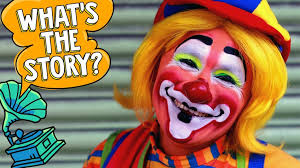

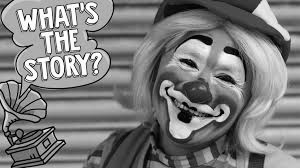

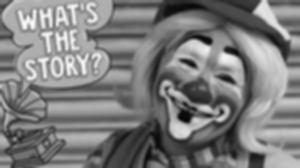

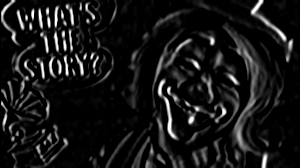

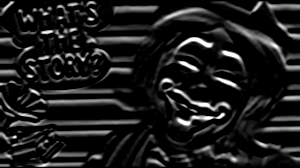

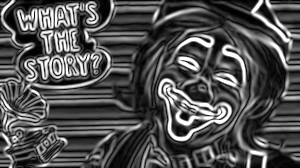

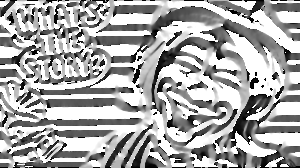

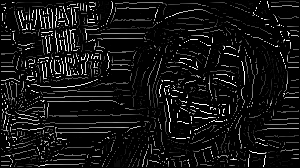

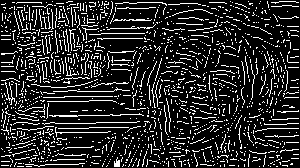

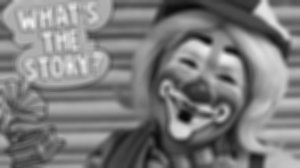

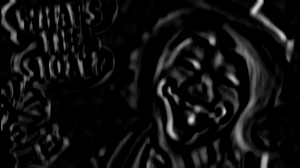

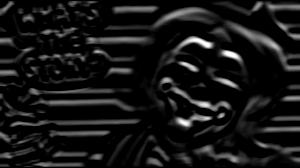

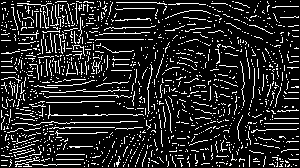

In [13]:
from google.colab.patches import cv2_imshow

# Display results
cv2_imshow(img)
cv2_imshow(gray)
cv2_imshow(blur)
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(magnitude)
cv2_imshow(angle)
cv2_imshow(nms)
cv2_imshow(canny)
cv2_imshow(blur_large)
cv2_imshow(sobelx_large)
cv2_imshow(sobely_large)
cv2_imshow(canny_large)

cv2.waitKey(0)
cv2.destroyAllWindows()